# GRADED CHALLENGE 1

Annesa Fadhila Damayanti

Batch 11

- untuk memprediksi harga uber dan lyft

## Import Libraries

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import pickle
import ast

## Data Loading

In [329]:
df = pd.read_csv('rideshare_kaggle.csv')

In [330]:
data = df.copy()
pd.set_option('display.max_columns', None)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [332]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

berdasarkan tabel, dapat dilihat bahwa column price memiliki rata-rata 16.545125 dengan temperature 39.584388.
sedangkan pada baris max, column price memiliki nilai sebesar 97.500000 dengan temperature 57.220000.
dapat diasumsikan bahwa, jika temperature sedang tinggi kebanyakan orang memilih untuk menggunakan uber atau lyft.

## Exploratory Data Analysis (EDA) & Data Preprocessing

In [333]:
df.drop(['id','timestamp','datetime'], inplace=True, axis=1)

mendrop ini karena menurut saya kolom tersebut tidak diperlukan untuk dilakukan analisis data

In [334]:
df_inf = df.sample(50, random_state=20)

In [335]:
df_train_test = df.drop(df_inf.index)
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

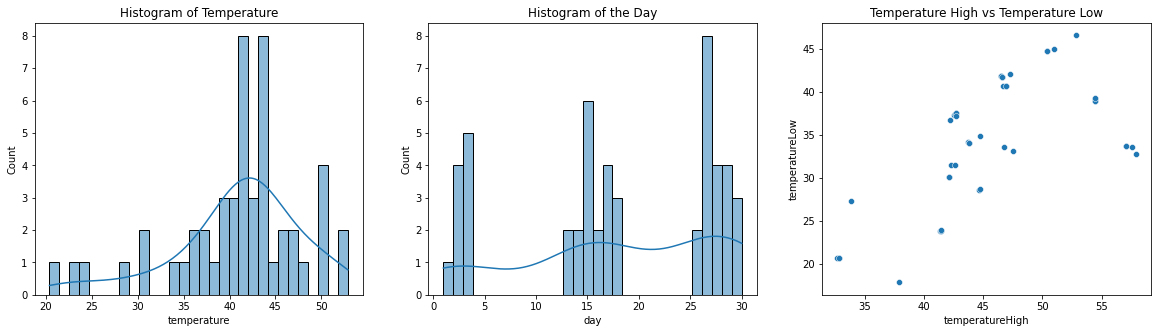

In [336]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df_inf['temperature'], bins=30, kde=True)
plt.title('Histogram of Temperature')

plt.subplot(1,3,2)
sns.histplot(df_inf['day'], bins=30, kde=True)
plt.title('Histogram of the Day')

plt.subplot(1,3,3)
sns.scatterplot(x='temperatureHigh', y='temperatureLow', data=df_inf)
plt.title('Temperature High vs Temperature Low')

plt.show()

pada plot yang di tampilkan terlihat bahwa data skew, yang berarti nilai mean dengan median, dan distribusi memiliki kemiringan.
sedangkan data temperature high dan temperature low mempunyai no autocorrelation karena data menyebar. 

### Split Dataset

In [337]:
X = df_train_test.drop(['price', 'distance','temperature'], axis=1)
y = df_train_test['price']

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [339]:
X_train.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
surge_multiplier               0
latitude                       0
longitude                      0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureLowTime     0
icon      

In [340]:
X_test.isnull().sum()

hour                           0
day                            0
month                          0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
surge_multiplier               0
latitude                       0
longitude                      0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTemperatureLow         0
apparentTemperatureLowTime     0
icon      

In [341]:
y_train.isnull().sum()

44041

In [342]:
y_test.isnull().sum()

11053

In [343]:
# handle Missing Value

y_train_impute = y_train.fillna(0)
y_test_impute = y_test.fillna(0)

In [344]:
# Get Numerical and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
catcolumns = X_train[['timezone', 'cab_type', 'short_summary', 'icon']]
cat_columns = list(catcolumns)

In [345]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [346]:
# Scalling menggunakan MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [347]:
# Encoder menggunakan OrdinalEncoder

encoder = OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

In [348]:
# Concate Columns

X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

In [349]:
X_train_df = pd.DataFrame(X_train_final, columns=[num_columns+list(cat_columns)])

## Model Definition

In [350]:
model = LinearRegression()

## Model Evaluation

In [351]:
model.fit(X_train_final, y_train_impute)

LinearRegression()

In [352]:
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

In [353]:
print('MAE train = ', mean_absolute_error(y_train_impute,y_pred_train))
print('MAE test = ', mean_absolute_error(y_test_impute,y_pred_test))

print('MSE train = ', mean_squared_error(y_train_impute,y_pred_train))
print('MSE test = ', mean_squared_error(y_test_impute,y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train_impute, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_absolute_error(y_test_impute,y_pred_test)))

print('r2score train = ', r2_score(y_train_impute,y_pred_train))
print('r2score test = ', r2_score(y_test_impute,y_pred_test))


MAE train =  7.729614746415199
MAE test =  7.722521732794575
MSE train =  92.29786808333989
MSE test =  92.02371823844008
RMSE train =  9.607177945855895
RMSE test =  2.7789425565841723
r2score train =  0.0774782433914799
r2score test =  0.08092792338901444


nilai MAE tidak sensitif terhadap outlier sehingga nilai pada train dan test diberi bobot yang sama rata-rata.
nilai MSE sangat sensitif terhadap outlier, mengukur kesalahan kuadrat rata-rata dari prediksi. semakin tinggi nilai ini, semakin buruk modelnya. sehingga dapat disimpulkan kalau data ini buruk.
nilai RMSE pada nilai train dan test berbeda jauh, dan di bandingkan dengan MAE. terlihat bahwa nilai train memiliki sedikit outlier sedangkan nilai test memiliki banyak outlier.
nilai r2 memiliki nilai yang sangat kecil atau jauh dari 1, sehingga dapat diartikan bahwa model ini buruk daripada memprediksi rata-rata. dapat juga diartikan bahwa model ini sangat dengan dengan baseline.

## Model Inference

In [354]:
# Save All Files

with open('model_scaler.pkl','wb') as file_1:
    pickle.dump(scaler, file_1)

with open('model_encoder.pkl','wb') as file_2:
    pickle.dump(encoder, file_2)

with open('model.pkl','wb') as file_3:
    pickle.dump(model, file_3)

with open ('list_num_columns.txt', 'w') as file_4:
    file_4.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_5:
    file_5.write(str(cat_columns))

In [355]:
# Load All Files

with open('model_scaler.pkl','rb') as file_1:
    model_scaler = pickle.load(file_1)

with open('model_encoder.pkl','rb') as file_2:
    model_encoder = pickle.load(file_2)

with open('model.pkl','rb') as file_3:
    model = pickle.load(file_3)

with open('list_num_columns.txt', 'r') as file_4:
    list_num_columns = file_4.read()

with open('list_cat_columns.txt', 'r') as file_5:
    list_cat_columns = file_5.read()

In [356]:
list_num_columns = ast.literal_eval(list_num_columns)
list_cat_columns = ast.literal_eval(list_cat_columns)

In [357]:
# Split Num Columns and Cat Columns

df_inf_num = df_inf[list_num_columns]
df_inf_cat = df_inf[list_cat_columns]

In [358]:
df_inf_num_scaled = model_scaler.transform(df_inf_num)
df_inf_cat_encoded = model_encoder.transform(df_inf_cat)

In [359]:
# Concate Num Columns and Cat Columns

df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)

In [360]:
# Predict Inference-Set

y_pred_inf = model.predict(df_inf_final)

In [361]:
# Convert into DataFrame

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Price_Prediction'])

In [362]:
# Merge Inference-Set and Prediction

pd.concat([df_inf,y_pred_inf_df], axis=1)

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Price_Prediction
0,9,17,12,America/New_York,Boston University,West End,Lyft,lyft_line,Shared,7.0,3.05,1.00,42.3644,-71.0661,35.84,29.23,Drizzle,Light rain in the morning.,0.0092,0.74,0.94,8.52,10.39,1545022800,3.606,41.39,1545076800,23.87,1545138000,35.93,1545076800,11.81,1545134400,rain,34.25,1004.71,352,1.00,0,3.606,329.7,1545048561,1545081260,0.33,0.0185,1545066000,34.07,1545044400,41.39,1545076800,28.17,1545044400,35.93,1545076800,16.586858
1,17,18,12,America/New_York,Northeastern University,Financial District,Lyft,lyft,Lyft,13.5,4.22,1.00,42.3429,-71.1003,30.78,20.93,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.40,12.73,22.33,1545127200,10.000,32.84,1545159600,20.72,1545220800,22.96,1545159600,14.48,1545195600,clear-day,9.15,1010.60,322,0.00,1,10.000,377.1,1545135001,1545167693,0.37,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200,16.550217
2,16,30,11,America/New_York,Theatre District,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,1.57,1.00,42.3503,-71.0810,40.13,38.00,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.62,3.46,4.47,1543554000,9.920,42.32,1543600800,31.57,1543665600,40.48,1543611600,28.10,1543658400,clear-day,27.99,1016.84,291,0.12,2,9.920,269.9,1543578871,1543612479,0.79,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600,13.271654
3,6,3,12,America/New_York,North Station,North End,Lyft,lyft_premier,Lux,13.5,1.04,1.00,42.3503,-71.0810,45.58,45.58,Foggy,Foggy in the morning.,0.0000,0.00,0.96,1.25,2.09,1543856400,1.413,57.02,1543852800,33.74,1543921200,56.35,1543852800,28.53,1543914000,fog,44.50,1001.06,307,1.00,0,1.413,290.9,1543838259,1543871628,0.89,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800,16.463724
4,17,30,11,America/New_York,South Station,Financial District,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.61,1.00,42.2148,-71.0330,41.46,39.41,Mostly Cloudy,Overcast throughout the day.,0.0000,0.00,0.57,3.57,4.27,1543557600,9.928,42.13,1543600800,30.17,1543662000,40.95,1543608000,25.87,1543662000,partly-cloudy-day,27.50,1016.11,266,0.86,1,9.928,271.7,1543578835,1543612492,0.79,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000,16.504787
5,20,28,11,America/New_York,West End,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,0.72,1.00,42.3644,-71.0661,41.91,36.71,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.60,8.42,13.00,1543431600,10.000,42.57,1543438800,37.37,1543489200,36.55,1543438800,31.91,1543478400,cloudy,29.05,992.85,295,1.00,0,10.000,355.0,1543405938,1543439719,0.72,0.0000,1543420800,33.70,1543399200,42.57,1543438800,29.94,1543399200,36.55,1543438800,13.515019
6,4,27,11,America/New_York,Beacon Hill,North End,Lyft,lyft,Lyft,7.0,1.56,1.00,42.3519,-71.0643,43.38,37.06,Rain,"Rain until morning, starting again in the eve...",0.1267,1.00,0.89,12.12,16.82,1543287600,4.273,46.59,1543255200,41.77,1543298400,43.97,1543251600,36.47,1543298400,rain,40.38,1000.86,78,1.00,0,4.273,289.5,1543233000,1543266976,0.64,0.1227,1543251600,40.35,1543233600,46.59,1543255200,36.96,1543291200,43.97,1543251600,16.754343
7,20,2,12,America/New_York,South Station,Theatre District,Lyft,lyft_plus,Lyft XL

## Pengambilan Kesimpulan

In [363]:
# Get Intercept and Slope

intercept = model.intercept_
slope= model.coef_

print('Intercept : ', intercept)
print('Slope : ', slope)

Intercept :  13.568968401434368
Slope :  [ 9.85562163e-02  3.31456650e+00  3.48696842e+00  4.53913217e+01
  3.16207197e-01  8.48547636e-02  1.75899218e-01 -1.82023176e-01
  4.43963401e-02  3.95795656e-01  4.31954029e-02 -8.12662520e-03
  1.45827701e+01  1.19488575e-01  1.73391591e+00  2.53673187e+01
 -2.66146370e+00  2.43549999e+00  3.64683823e+00  2.23995000e+01
  1.66530006e+00  5.21467440e+00 -7.66028435e-01 -4.34321462e-01
 -4.25763133e-02  7.99991876e-02  6.08040312e-02  1.19488514e-01
 -3.27686469e-01 -8.41466544e+03  8.40605108e+03  3.65316574e-01
  5.06261963e-02 -1.89507343e+01 -7.10398173e-01 -7.91025038e+00
 -4.09463718e-02 -6.60755338e+00 -1.94060325e-01 -2.73573743e+00
 -2.92868785e+00 -2.71798120e+01 -3.45607987e-11 -3.09069404e+00
  8.83963843e-04  1.67759885e-02]


berdasarkan hasil intercept, karena nilai jauh mendekati 0 maka intercept memiliki makna yang berarti antara variable X dan Y

# Kesimpulan

- nilai MAE tidak sensitif terhadap outlier sehingga nilai pada train dan test diberi bobot yang sama rata-rata.
- nilai MSE sangat sensitif terhadap outlier, mengukur kesalahan kuadrat rata-rata dari prediksi. semakin tinggi nilai ini, semakin buruk modelnya. sehingga dapat disimpulkan kalau data ini buruk.
- nilai RMSE pada nilai train dan test berbeda jauh, dan di bandingkan dengan MAE. terlihat bahwa nilai train memiliki sedikit outlier sedangkan nilai test memiliki banyak outlier.
- nilai r2 memiliki nilai yang sangat kecil atau jauh dari 1, sehingga dapat diartikan bahwa model ini buruk daripada memprediksi rata-rata. dapat juga diartikan bahwa model ini sangat dengan dengan baseline.

------

- berdasarkan hasil intercept, karena nilai jauh mendekati 0 maka intercept memiliki makna yang berarti antara variable X dan Y

-------

- terdapat nilai prediksi pada price_prediction columns. pada kolom tersebut terlihat prediksi harga yang berpengaruh terhadap distance dan temperature

In [ ]:
#### X = df_real.drop(['education','race','capital_gain','capital_loss','native_country','income_bracket'], axis=1)
#### y = df_real['income_bracket']